Loaded shapes: [(4480, 6720, 3), (4480, 6720, 3), (4480, 6720, 3)]
Resized shapes: [(1120, 1680, 3), (1120, 1680, 3), (1120, 1680, 3)]
Alignment complete.
Using exposure times: [0.03333334 0.25       1.        ]


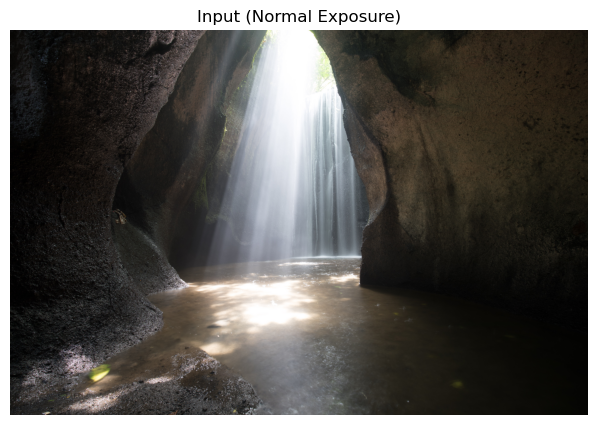

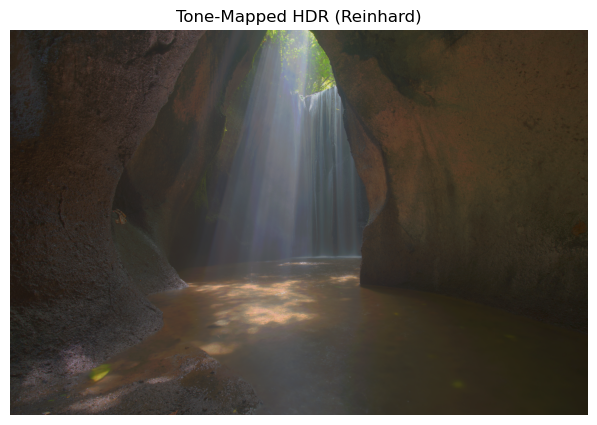

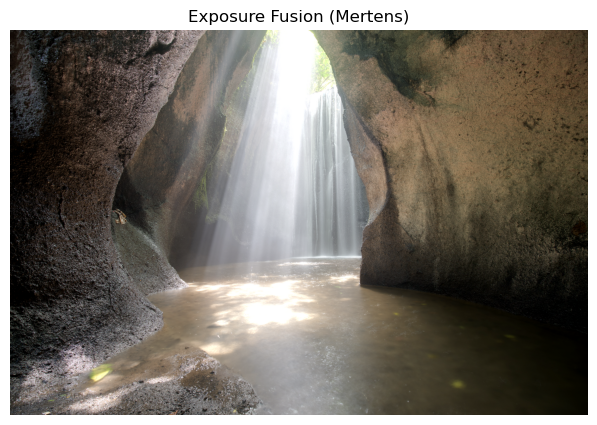

All output images displayed successfully!


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Load images
# ---------------------------
filenames = [
    "D:/sem 6/DIP/hdr_images/Waterfall_under.jpg",
    "D:/sem 6/DIP/hdr_images/Waterfall.jpg",
    "D:/sem 6/DIP/hdr_images/Waterfall_over.jpg"
]

imgs = [cv2.imread(f) for f in filenames]
print("Loaded shapes:", [im.shape for im in imgs])

# ---------------------------
# RESIZE IMAGES → IMPORTANT
# ---------------------------
scale = 0.25   # reduce size to 25%
imgs = [cv2.resize(im, None, fx=scale, fy=scale) for im in imgs]
print("Resized shapes:", [im.shape for im in imgs])

# ---------------------------
# Align the images
# ---------------------------
align = cv2.createAlignMTB()
aligned = imgs.copy()
align.process(aligned, aligned)
print("Alignment complete.")

# ---------------------------
# Exposure times
# ---------------------------
times = np.array([1/30.0, 1/4.0, 1.0], dtype=np.float32)
print("Using exposure times:", times)

# ---------------------------
# CRF calibration
# ---------------------------
calibrate = cv2.createCalibrateDebevec()
response = calibrate.process(aligned, times)

# ---------------------------
# Build HDR image
# ---------------------------
merge = cv2.createMergeDebevec()
hdr = merge.process(aligned, times, response)

# ---------------------------
# Tone map for display
# ---------------------------
tonemap = cv2.createTonemapReinhard(gamma=1.0)
ldr = tonemap.process(hdr)
ldr_8 = np.clip(ldr * 255, 0, 255).astype("uint8")

# ---------------------------
# Exposure Fusion
# ---------------------------
fusion = cv2.createMergeMertens().process(aligned)
fusion_8 = np.clip(fusion * 255, 0, 255).astype("uint8")

# ---------------------------
# DISPLAY IMAGES IN OUTPUT PANEL
# ---------------------------
def show(title, img):
    plt.figure(figsize=(8,5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

show("Input (Normal Exposure)", aligned[1])
show("Tone-Mapped HDR (Reinhard)", ldr_8)
show("Exposure Fusion (Mertens)", fusion_8)

print("All output images displayed successfully!")
